In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Model,Sequential

In [2]:
train_f1 = os.listdir('./cropped_faces/face1')
train_f2 = os.listdir('./cropped_faces/face2')

In [3]:
def create_data(case,index,batch_size=32):
    data=[]
    if not case :
        for i in train_f1[index:index+batch_size]:
            for j in train_f2:
                data.append([i,j])
        return data
    if case :
        for i in train_f1[index:index+batch_size]:
            for j in train_f1:
                data.append([i,j])
        return data

In [4]:
def load_img(data,case):
    dataset = []
    for i in range(len(data)):
        img1 = str(data[i][0])
        img2 = str(data[i][1])
        img1 = cv2.imread('./cropped_faces/face1/'+img1,0)
        if case:
            img2 = cv2.imread('./cropped_faces/face1/'+img2,0)
        else:
            img2 = cv2.imread('./cropped_faces/face2/'+img2,0)
        img1 = cv2.resize(img1,(224,224))
        img2 = cv2.resize(img2,(224,224))
        dataset.append([img1,img2])
    return dataset

In [5]:
input1 = tf.keras.Input(shape=(224,224,1))
input2 = tf.keras.Input(shape=(224,224,1))

x1 = tf.keras.layers.Conv2D(32,(3,3),activation='relu')(input1)
x1 = tf.keras.layers.MaxPooling2D((4,4))(x1)
x1 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(x1)
x1 = tf.keras.layers.MaxPooling2D((4,4))(x1)
x1 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(x1)
x1 = tf.keras.layers.MaxPooling2D((4,4))(x1)

x2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu')(input2)
x2 = tf.keras.layers.MaxPooling2D((4,4))(x2)
x2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(x2)
x2 = tf.keras.layers.MaxPooling2D((4,4))(x2)
x2 = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(x2)
x2 = tf.keras.layers.MaxPooling2D((4,4))(x2)

# x = tf.keras.layers.add([x1,x2])
x = tf.keras.layers.concatenate([x1,x2])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(224,activation='relu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model= tf.keras.Model(inputs=[input1,input2],outputs=output)

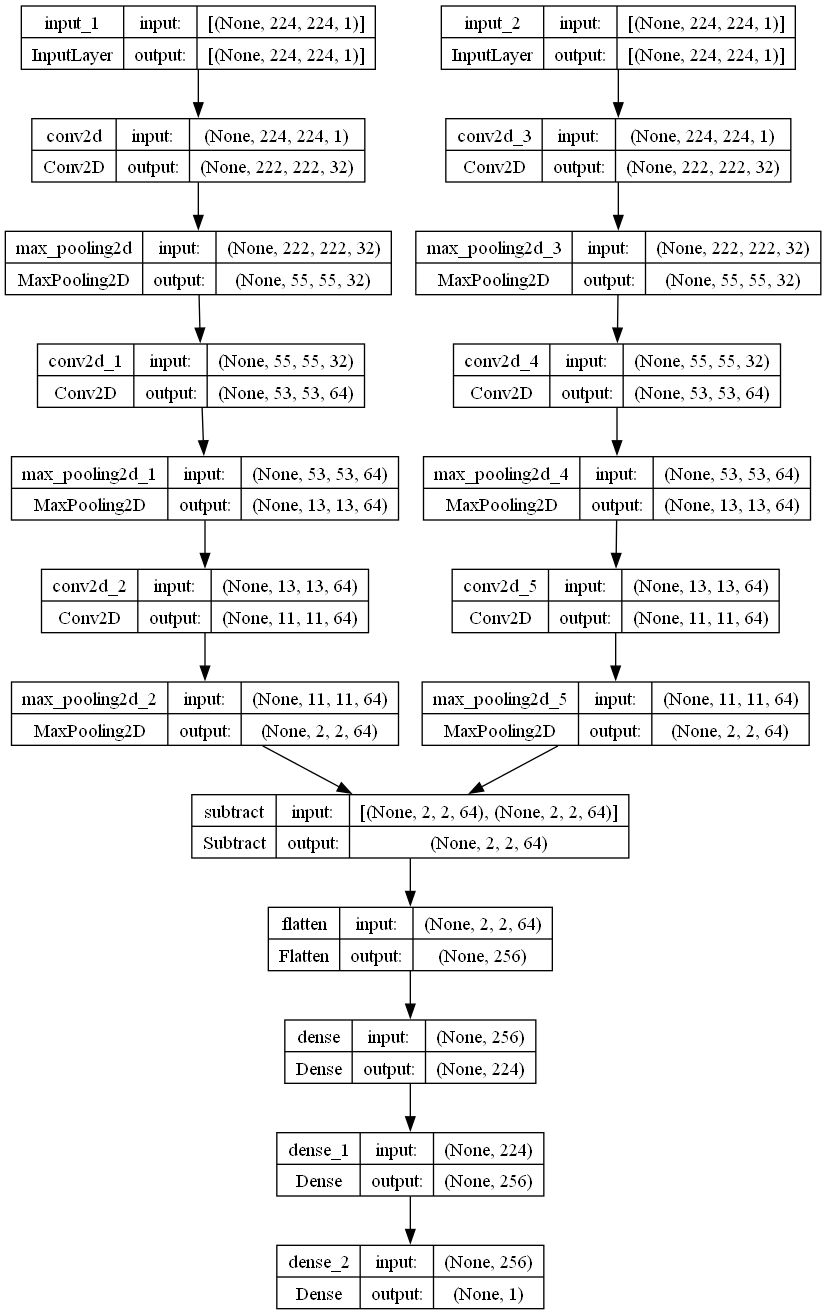

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [8]:
class datagen(tf.keras.utils.Sequence):
	def __init__(self,batch_size=5):
		self.batch_size = batch_size
  
	def __len__(self):
		return int(len(self.dataset1)/self.batch_size)
		# return 6

	def __getitem__(self,index):
		self.dataset1 = load_img(create_data(1,index*self.batch_size,self.batch_size),1)
		self.dataset0 = load_img(create_data(0,index*self.batch_size,self.batch_size),0)
		x1 = []
		x2 = []
		y = []
		for i in range(len(self.dataset1)):
			x1.append(self.dataset1[i][0])
			x2.append(self.dataset1[i][1])
			y.append(1)
		for i in range(len(self.dataset0)):
			x1.append(self.dataset0[i][0])
			x2.append(self.dataset0[i][1])
			y.append(0)
		x1 = np.array(x1)
		x2 = np.array(x2)
		y = np.array(y)
		return [x1,x2],y

In [9]:
dataset=datagen()

In [10]:
dataset.__getitem__(0)[0][0].shape

(350, 224, 224)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 222, 222, 32)         320       ['input_2[0][0]']             
                                                                                              

In [12]:
model.fit(dataset,epochs=10,validation_data=val_data, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)])

NameError: name 'val_data' is not defined

In [ ]:
model.save("sim_model2.h5")
# model.save("sim_model.keras")

In [ ]:
from keras.models import load_model
use_model= load_model("./sim_model2.h5")

In [ ]:
x1 = cv2.imread("./data1/input_images/WIN_20231028_15_32_52_Pro.jpg",0)
x2 = cv2.imread("./data1/input_images/WIN_20231028_15_32_52_Pro.jpg",0)
x1 = cv2.resize(x1,(224,224))
x2 = cv2.resize(x2,(224,224))
x1 = tf.expand_dims(x1,0)
x2 = tf.expand_dims(x2,0)

In [ ]:
data=[x1,x2]

In [ ]:
use_model.predict(data)